#**IMPORTING(ANCHE PER JOIN SPAZIALI)**

In [1]:
import os
!pip install rtree
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
os.chdir("/content/spatialindex-src-1.8.5")
!./configure
!make
!make install
!ldconfig



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   573k      0 --:--:-- --:--:-- --:--:--  572k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [2]:
!pip install geopandas

In [3]:
%matplotlib inline

import pandas as pd
import geopandas

#**Il Comune di Milano vuole fare un'analisi riguardante le aree di sosta per il parcheggio delle biciclette.**
#**Ha messo a disposizione quindi tre dataset (in allegato) e ha chiesto di avere un report con le seguenti informazioni:**


# **1-- una lista (elenco) delle aree di sosta, indicando il nome della via, il numero civico e il numero di posti totali per le biciclette**

In [4]:
quartieri = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf')

In [5]:
aree_sosta = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/bike_areesosta/bike_areesosta.dbf',)
aree_sosta

id_amat  ...                  geometry
0           2  ...  POINT (9.17821 45.42991)
1           4  ...  POINT (9.16829 45.51697)
2           8  ...  POINT (9.08480 45.47628)
3           9  ...  POINT (9.15673 45.48228)
4          10  ...  POINT (9.12054 45.45506)
...       ...  ...                       ...
1517     3232  ...  POINT (9.16586 45.50530)
1518     3233  ...  POINT (9.16628 45.50584)
1519     3234  ...  POINT (9.16634 45.50568)
1520     3235  ...  POINT (9.16633 45.50532)
1521     3243  ...  POINT (9.21895 45.43356)

[1522 rows x 12 columns]

In [6]:
stradario = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stradario.csv')
stradario

CODICE_VIA AREA DESCRIZIONE_VIA  CIVICO BARRATO  CAP  SEZIONE  MUNICIPIO
0            4377  VIA  8 OTTOBRE 2001      12     NaN  138      916          4
1            3123  VIA     A.DEL SARTO       1     NaN  129      665          3
2            3123  VIA     A.DEL SARTO       3     NaN  129      665          3
3            3123  VIA     A.DEL SARTO       4     NaN  129      665          3
4            3123  VIA     A.DEL SARTO       5     NaN  129      665          3
...           ...  ...             ...     ...     ...  ...      ...        ...
51318        6318  VIA          ZURIGO      24     NaN  147      394          7
51319        6318  VIA          ZURIGO      24       4  147      394          7
51320        6318  VIA          ZURIGO      25     NaN  147     1412          6
51321        6318  VIA          ZURIGO      28     NaN  147      539          7
51322        6318  VIA          ZURIGO      65     NaN  147     1412          6

[51323 rows x 8 columns]

In [7]:
aree_sosta['id_via']= aree_sosta['id_via'].astype(str)


In [8]:
stradario['CODICE_VIA']= stradario['CODICE_VIA'].astype(str)
stradario.CODICE_VIA.dtypes

dtype('O')

In [9]:
strada_sosta = pd.merge(aree_sosta, stradario, how="inner", left_on ='id_via',right_on= 'CODICE_VIA')
strada_sosta[['DESCRIZIONE_VIA','CIVICO','stalli_tot']]

DESCRIZIONE_VIA  CIVICO  stalli_tot
0       ABBIATEGRASSO       1          15
1       ABBIATEGRASSO       2          15
2       ABBIATEGRASSO       7          15
3       ABBIATEGRASSO       8          15
4       ABBIATEGRASSO      12          15
...               ...     ...         ...
39919     SAN DIONIGI     117          30
39920     SAN DIONIGI     119          30
39921     SAN DIONIGI     120          30
39922     SAN DIONIGI     121          30
39923     SAN DIONIGI     135          30

[39924 rows x 3 columns]

# 2- una lista (elenco) analogo al precedente ma con anche  l'indicazione del quartiere

In [10]:
quartieri

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

In [11]:
df_total = geopandas.sjoin(strada_sosta,quartieri,op = 'within',how='left')
df_total2 = df_total[['DESCRIZIONE_VIA','CIVICO','NIL','stalli_tot']]
df_total2

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2822: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if self.run_code(code, result):


DESCRIZIONE_VIA  ...  stalli_tot
0       ABBIATEGRASSO  ...          15
1       ABBIATEGRASSO  ...          15
2       ABBIATEGRASSO  ...          15
3       ABBIATEGRASSO  ...          15
4       ABBIATEGRASSO  ...          15
...               ...  ...         ...
39919     SAN DIONIGI  ...          30
39920     SAN DIONIGI  ...          30
39921     SAN DIONIGI  ...          30
39922     SAN DIONIGI  ...          30
39923     SAN DIONIGI  ...          30

[39924 rows x 4 columns]

# **3-i nomi dei quartieri in cui non ci sono aree di sosta;**

In [12]:
quartieri[['NIL']]

NIL
0   RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO
1                                           TRENNO
2                                         PORTELLO
3                                        BOVISASCA
4                                       PARCO NORD
..                                             ...
83                                          PAGANO
84                                           BRERA
85                         ROGOREDO - SANTA GIULIA
86                                         ADRIANO
87                                     LORENTEGGIO

[88 rows x 1 columns]

In [13]:
df_total[['NIL']]

NIL
0      STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
1      STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
2      STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
3      STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
4      STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA...
...                                                  ...
39919                                       SCALO ROMANA
39920                                       SCALO ROMANA
39921                                       SCALO ROMANA
39922                                       SCALO ROMANA
39923                                       SCALO ROMANA

[39924 rows x 1 columns]

In [14]:
nososta2 = quartieri[~quartieri['NIL'].isin(df_total['NIL'])]  #  ~  serve per invertire i valori
nososta2

ID_NIL  ...                                           geometry
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
5       63  ...  POLYGON ((9.08375 45.48485, 9.08280 45.48521, ...
22      75  ...  POLYGON ((9.13009 45.50820, 9.13016 45.50784, ...
23      47  ...  POLYGON ((9.16112 45.42589, 9.16270 45.42544, ...
24      39  ...  POLYGON ((9.21047 45.39699, 9.21039 45.39698, ...
28      88  ...  POLYGON ((9.07309 45.50604, 9.07326 45.50589, ...
36      87  ...  POLYGON ((9.04687 45.46276, 9.04688 45.46276, ...
46      40  ...  POLYGON ((9.18364 45.40122, 9.18442 45.40004, ...
48      31  ...  POLYGON ((9.27271 45.46079, 9.27276 45.46072, ...
54      34  ...  POLYGON ((9.24507 45.41742, 9.24303 45.41508, ...
80      73  ...  POLYGON ((9.09928 45.53128, 9.09932 45.53118, ...
82      86  ...  POLYGON ((9.13886 45.42855, 9.13901 45.42836, ...

[12 rows x 9 columns]

# **4- una mappa di Milano con l'indicazione dei quartieri in cui non ci sono aree di sosta**

In [15]:
!pip install contextily

In [16]:
import contextily as ctx

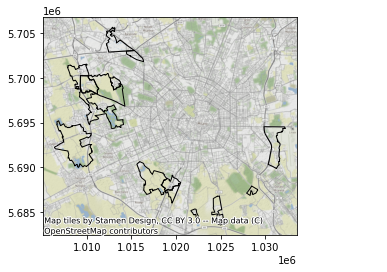

In [17]:
ax = nososta2.to_crs(epsg=3857).plot(edgecolor = 'k',color ='none')
ctx.add_basemap(ax)

# **5- il nome del quartiere con più aree di sosta;**

In [18]:
max_sosta = df_total.groupby('NIL',as_index=False)[['stalli_tot']].count()
quartiereMax = max_sosta[max_sosta['stalli_tot'] ==max_sosta['stalli_tot'].max()]
quartiereMax

NIL  stalli_tot
31  LORETO - CASORETTO - NOLO        4090

# **6- una mappa di Milano con l'indicazione del quartiere con più aree di sosta;**



/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:684: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 27 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


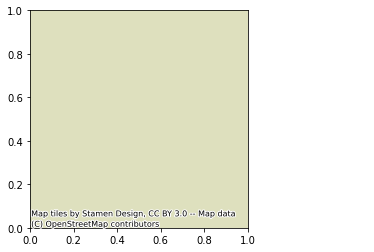

In [19]:
ax = quartieri[quartieri.NIL.isin(quartiereMax.index)].to_crs(3857).plot(alpha=0.5)
ctx.add_basemap(ax)

# **7- i nomi dei quartieri con un numero di aree di sosta minori della media;**

In [20]:
Quart_Mean = df_total.groupby('NIL')['stalli_tot'].count().mean()
QuartieriMedia = df_total.groupby('NIL')[['stalli_tot']].count()[df_total.groupby('NIL')['stalli_tot'].count() < Quart_Mean].sort_values(by = 'stalli_tot' )
QuartieriMedia

stalli_tot
NIL                                                           
PARCO NORD                                                   6
MAGGIORE - MUSOCCO - CERTOSA                                 8
PARCO DELLE ABBAZIE                                         12
TIBALDI                                                     16
PARCO SEMPIONE                                              18
COMASINA                                                    20
ROSERIO                                                     23
TRE TORRI                                                   28
TRIULZO SUPERIORE                                           29
TALIEDO - MORSENCHIO - Q.RE FORLANINI                       46
RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO              52
ROGOREDO - SANTA GIULIA                                     54
FARINI                                                      64
ORTOMERCATO                                                 69
QUARTO CAGNINO                                              71
QT 8                                                        73
SAN SIRO                                                    81
MUGGIANO                                                    99
ADRIANO                                                     99
QUINTO ROMANO                                              100
BRUZZANO                                                   130
BOVISASCA                                                  146
PARCO FORLANINI - CAVRIANO                                 150
MONCUCCO - SAN CRISTOFORO                                  183
GHISOLFA                                                   189
STADIO - IPPODROMI                                         216
GRATOSOGLIO - Q.RE MISSAGLIA - Q.RE TERRAZZE               220
BARONA                                                     236
LAMBRATE - ORTICA                                          240
QUARTO OGGIARO - VIALBA - MUSOCCO                          243
SCALO ROMANA                                               244
MORIVIONE                                                  248
VIGENTINO - Q.RE FATIMA                                    249
PORTA MAGENTA                                              270
UMBRIA - MOLISE - CALVAIRATE                               277
PORTA VIGENTINA - PORTA LODOVICA                           284
PORTA TICINESE - CONCA DEL NAVIGLIO                        287
GIARDINI P.TA VENEZIA                                      336
PORTELLO                                                   354
DERGANO                                                    354
GIAMBELLINO                                                357
GRECO - SEGNANO                                            365
PORTA TICINESE - CONCHETTA                                 387
BOVISA                                                     395
BICOCCA                                                    401
XXII MARZO                                                 409
LORENTEGGIO                                                428
BANDE NERE                                                 444
MACIACHINI - MAGGIOLINA                                    445
PAGANO                                                     447
DE ANGELI - MONTE ROSA                                     454
STADERA - CHIESA ROSSA - Q.RE TORRETTA - CONCA ...         469
MAGENTA - S. VITTORE                                       474
AFFORI                                                     491

# **8- una mappa di Milano con l'indicazione  dei quartieri con un numero di aree di sosta minori della media; sezione**

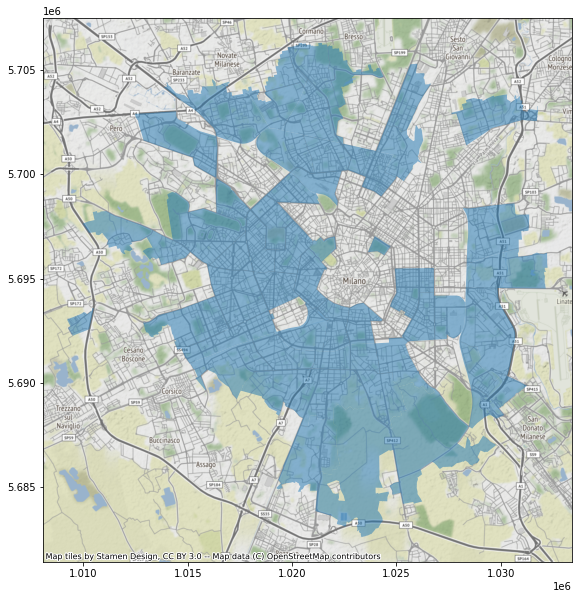

In [21]:
ax = quartieri[quartieri.NIL.isin(QuartieriMedia.index)].to_crs(3857).plot(alpha=0.5,figsize =(10,10))
ctx.add_basemap(ax)

# **9- una mappa di Milano con i diversi quartieri contornati in nero e l'indicazione delle aree di sosta, sottoforma di punti rossi;**

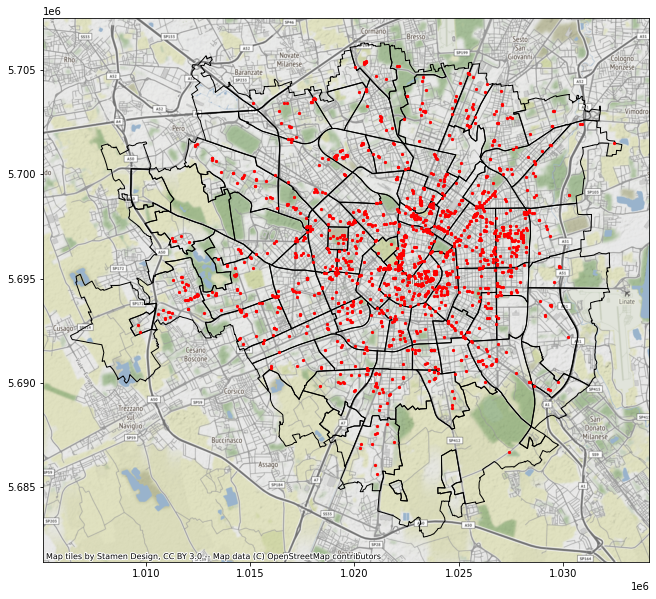

In [22]:
ax = quartieri.to_crs(epsg = 3857).plot(edgecolor = 'k',facecolor = 'none',figsize=(15,10))
aree_sosta.to_crs(epsg = 3857).plot(ax=ax, color='red',markersize = 5)
ctx.add_basemap(ax)

# **10- una mappa di Milano con i diversi quartieri colorati a seconda del numero di aree di sosta presenti, con una legenda che indichi il significato dei colori;**

In [23]:
num_sosta = aree_sosta.count()
num_sosta

id_amat       1522
id_via        1522
num_civico    1264
municipio     1522
stato         1522
categoriev    1522
numero_man    1522
stalli_per    1522
stalli_tot    1522
tipomanufa    1522
ubicazione    1522
geometry      1513
dtype: int64

In [24]:
quartieri_count = pd.merge(max_sosta,quartieri, how = "right", on = "NIL")
quartieri_count

NIL  ...                                           geometry
0   RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1                                           TRENNO  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2                                         PORTELLO  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3                                        BOVISASCA  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4                                       PARCO NORD  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..                                             ...  ...                                                ...
83                                          PAGANO  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84                                           BRERA  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85                         ROGOREDO - SANTA GIULIA  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86                                         ADRIANO  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87                                     LORENTEGGIO  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 10 columns]

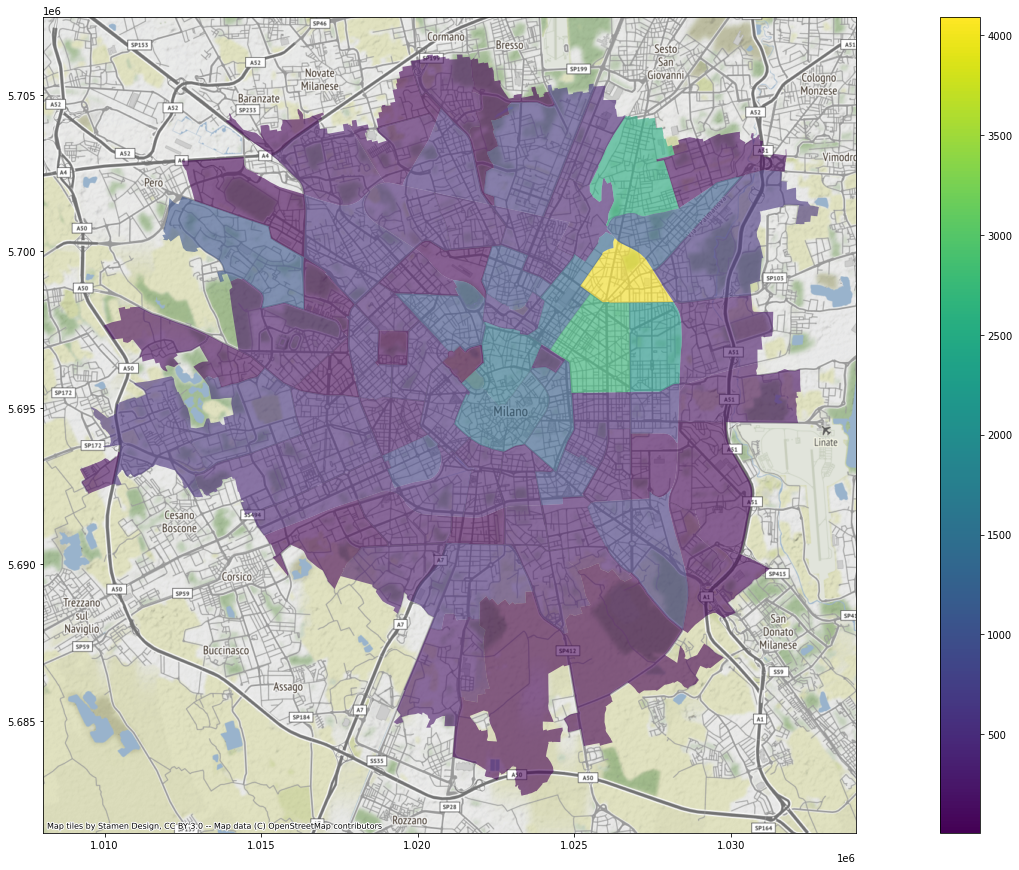

In [25]:
ax = quartieri_count.to_crs(epsg=3857).plot(column = "stalli_tot", alpha = 0.6, figsize = (30,15), legend = True)
ctx.add_basemap(ax)

# **11- data una via (inserita dall'utente), avere le aree di sosta di quella via**

In [26]:
lst_codice = list(strada_sosta['CIVICO'])                                        #definiamo lst_codice e creamo una lista con quei valori
lst_nome = list(strada_sosta['DESCRIZIONE_VIA'])                                 #definiamo lst_nome e creamo una lista con quei valori
via_input = str(input("inserire id della via: "))                                #input della via
if via_input not in lst_nome:                                                    #primo if serve per controllare se l'input inserite rientra tra i valori della lista scelta
  print('via Inesistente')                                                       #messaggio
else:                                                                            #in caso rientri tra i valori eseguiamo un'altra azione, il numero civico
  num_via_input = int(input('inserire civico: '))                                #inseriamo numero civico
  if num_via_input not in lst_codice:                                            #secondo  if serve per controllare se l'input inserite rientra tra i valori della lista scelta
     print('civico Inesistente')                                                 #messaggio
  else:                                                                          #nel caso anche questo secondo valore rientri tra i valori della lista richiamata, allora eseguiamo la nostra opzione principale, dato che abbiamo tutti i dati che ci servono
    strada_sosta_nome= strada_sosta[strada_sosta.DESCRIZIONE_VIA == via_input]   #creamo strada_sosta_nome, che è uguale a strada_sosta con già i nomi delle vie filtrate, per poi farlo nella riga dopo ma con il civico.
    display(strada_sosta_nome[strada_sosta_nome.CIVICO == num_via_input])        #display e' una funzione di ipython, di solito se scrivi qualcosa la utilizza in automatico ma solo con l'ultimo valore che trova

inserire id della via: ABBIATEGRASSO
inserire civico: 2


id_amat id_via num_civico municipio  ... BARRATO  CAP  SEZIONE  MUNICIPIO
1        2   5339          0         5  ...     NaN  142     2066          5

[1 rows x 20 columns]

# **12- dato un quartiere (inserito dall'utente), avere la mappa di quel quartiere con l'indicazione della posizione delle aree di sosta**

In [27]:
quartiere = geopandas.read_file('/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm/NIL_WM.dbf')
quartiere

ID_NIL  ...                                           geometry
0       48  ...  POLYGON ((9.15422 45.43775, 9.15419 45.43707, ...
1       64  ...  POLYGON ((9.10623 45.49016, 9.10295 45.48939, ...
2       67  ...  POLYGON ((9.15636 45.48785, 9.15724 45.48721, ...
3       81  ...  POLYGON ((9.16803 45.52234, 9.16687 45.52027, ...
4       84  ...  POLYGON ((9.20040 45.52848, 9.20055 45.52828, ...
..     ...  ...                                                ...
83      68  ...  POLYGON ((9.17174 45.47619, 9.17150 45.47595, ...
84       2  ...  POLYGON ((9.19165 45.46906, 9.19105 45.46843, ...
85      33  ...  POLYGON ((9.24044 45.44427, 9.24084 45.44424, ...
86      17  ...  POLYGON ((9.26729 45.51234, 9.26701 45.51241, ...
87      53  ...  POLYGON ((9.13575 45.44969, 9.13318 45.44886, ...

[88 rows x 9 columns]

inserire quartiere: PAGANO


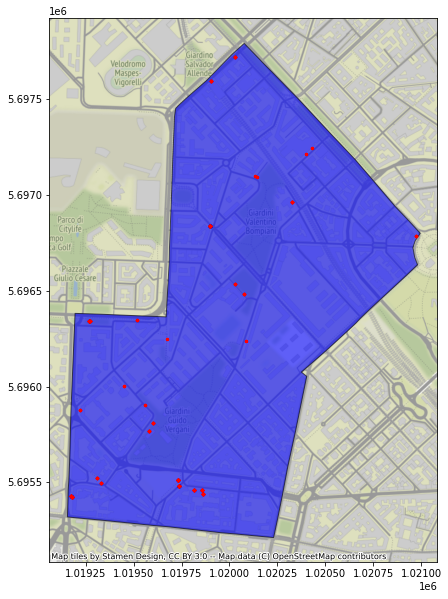

In [28]:
quartiere_input = str(input('inserire quartiere: '))
df_total_quart_input = df_total[df_total.NIL == quartiere_input]


quart_nome = quartiere[quartiere.NIL == quartiere_input]


ax = quart_nome.to_crs(epsg = 3857).plot(edgecolor = 'k',facecolor ='blue',alpha = 0.6,figsize=(15,10))
df_total_quart_input.to_crs(epsg = 3857).plot(ax=ax,color='red',markersize = 5)
ctx.add_basemap(ax)

# **13- date le coordinate geografiche di un punto (inserite dall'utente), avere una mappa che visualizzi le aree di sosta a meno di 500 m da quel punto;**

In [29]:
from shapely.geometry import Point

In [40]:
df_total.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

inserire coordinata n1: 9.17
inserire coordinata n2: 45.42


/usr/local/lib/python3.7/dist-packages/contextily/tile.py:581: UserWarning: The inferred zoom level of 19 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


HTTPError: ignored

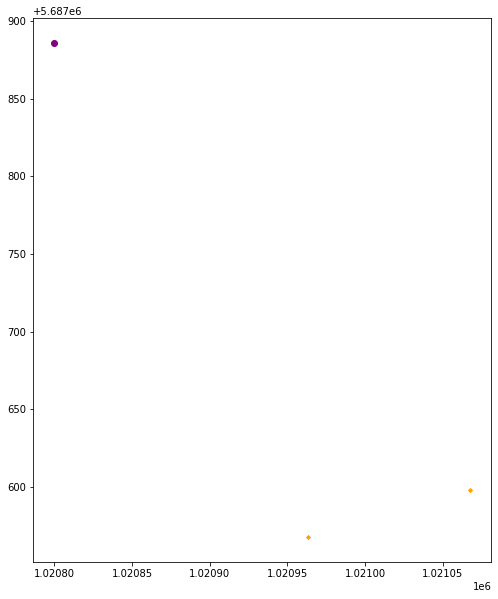

In [43]:
coordinate_input1 = float(input('inserire coordinata n1: '))
coordinate_input2 = float(input('inserire coordinata n2: '))
coordinate1 = Point(coordinate_input1,coordinate_input2)

df_coordinate = df_total[df_total.to_crs(epsg= 3857).distance(geopandas.GeoSeries([coordinate1],crs='EPSG:4326').to_crs(epsg = 3857)[0])<= 500]

ax = df_coordinate.to_crs(epsg = 3857).plot(figsize=(10,10),color ='orange',markersize = 5)
geopandas.GeoSeries([coordinate1],crs='EPSG:4326').to_crs(epsg = 3857).plot(ax=ax,color ='purple')
ctx.add_basemap(ax)

In [39]:
df_total.to_crs(epsg= 3857).distance(geopandas.GeoSeries([coordinate1],crs='EPSG:3857')[0])

0        5.780423e+06
1        5.780423e+06
2        5.780423e+06
3        5.780423e+06
4        5.780423e+06
             ...     
39919    5.781796e+06
39920    5.781796e+06
39921    5.781796e+06
39922    5.781796e+06
39923    5.781796e+06
Length: 39924, dtype: float64

In [ ]:
df_total.distance(coordinate1)

In [ ]:
df_total.head(300)